In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
import calendar
from math import sin,cos,sqrt,atan2,radians

In [47]:
taxi_train=pd.read_csv('C:\\Users\\Krithika Ganesh\\OneDrive - Oklahoma A and M System\\Personal Projs\\NY Taxi Fare Prediction\\train.csv', nrows=6000000)

In [48]:
#Data Preprocessing

In [49]:
taxi_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [50]:
#Now we see that the dataset contains pickup date time, fare amount, longitude and latitude of pickup location and dropoff location as well as passenger count

In [51]:
# checking the data types of the dataset variables
taxi_train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [52]:
# date time is of type object , converting it to relevant date time type
taxi_train.pickup_datetime=pd.to_datetime(taxi_train.pickup_datetime, format='%Y-%m-%d %H:%M:%S UTC')

In [53]:
taxi_train.dtypes

key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [54]:
taxi_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [55]:
#creating day, time features from datetime
taxi_train['pickup_date']=taxi_train.pickup_datetime.dt.date
taxi_train['pickup_day']=taxi_train.pickup_datetime.apply(lambda x:x.day)
taxi_train['pickup_hour']=taxi_train.pickup_datetime.apply(lambda x:x.hour)
taxi_train['pickup_weekday']=taxi_train.pickup_datetime.apply(lambda x:calendar.day_name[x.weekday()])
taxi_train['pickup_month']=taxi_train.pickup_datetime.apply(lambda x:x.month)
taxi_train['pickup_year']=taxi_train.pickup_datetime.apply(lambda x:x.year)

In [56]:
taxi_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_weekday,pickup_month,pickup_year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [57]:
val=pd.isnull(taxi_train).sum()

In [58]:
missing_percent=val/taxi_train.count()

In [59]:
missing_percent

key                  0.000000
fare_amount          0.000000
pickup_datetime      0.000000
pickup_longitude     0.000000
pickup_latitude      0.000000
dropoff_longitude    0.000007
dropoff_latitude     0.000007
passenger_count      0.000000
pickup_date          0.000000
pickup_day           0.000000
pickup_hour          0.000000
pickup_weekday       0.000000
pickup_month         0.000000
pickup_year          0.000000
dtype: float64

In [60]:
#Deleting the null values as the percentage of missing values is negligible

In [61]:
taxi_train=taxi_train[taxi_train['dropoff_latitude'].notnull()]

In [62]:
taxi_train=taxi_train[taxi_train['dropoff_longitude'].notnull()]

In [63]:
pd.isnull(taxi_train).sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_date          0
pickup_day           0
pickup_hour          0
pickup_weekday       0
pickup_month         0
pickup_year          0
dtype: int64

In [64]:
#Explotatory Analysis

In [65]:
taxi_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_weekday,pickup_month,pickup_year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


C:\Users\Krithika Ganesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


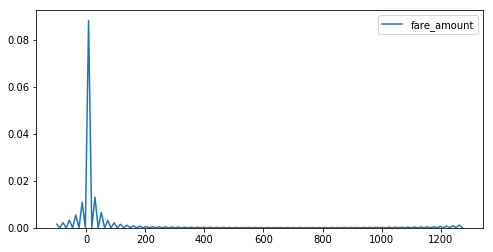

In [66]:
# how is fare amount distributed
plt.figure(figsize=(8,4))
sns.kdeplot(taxi_train.fare_amount)

In [67]:
# Since there are few negative  values 
taxi_train.loc[taxi_train.fare_amount<0].shape

(262, 14)

In [68]:
taxi_train.loc[taxi_train.fare_amount>=0].shape

(5999699, 14)

C:\Users\Krithika Ganesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Krithika Ganesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\Krithika Ganesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Krithika Ganesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


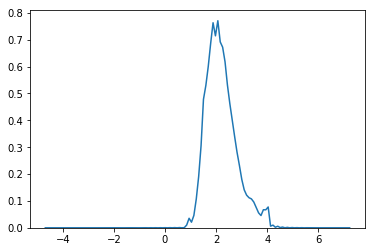

In [69]:
#As we see skewness in the plot, performing log transformation
sns.kdeplot(np.log(taxi_train.fare_amount.values))

{'whiskers': [<matplotlib.lines.Line2D at 0x1b0fc42ae48>,
 'caps': [<matplotlib.lines.Line2D at 0x1b0fc431518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b0fc42aa58>],
 'medians': [<matplotlib.lines.Line2D at 0x1b0fc431ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b0fc431ef0>],
 'means': []}

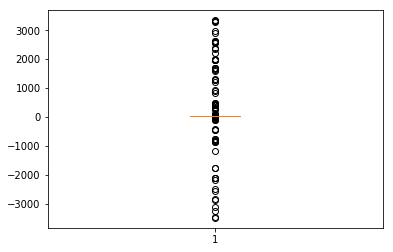

In [70]:
plt.figsize=(20,18)
plt.boxplot(taxi_train.pickup_latitude)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b008bb2b70>,
 'caps': [<matplotlib.lines.Line2D at 0x1b008bb2f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b008bb2780>],
 'medians': [<matplotlib.lines.Line2D at 0x1b008bbb8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b008bbbc18>],
 'means': []}

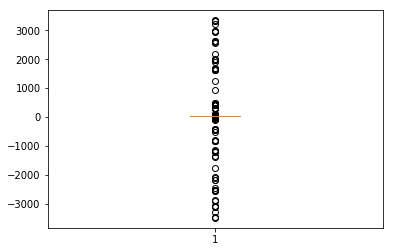

In [71]:
plt.figsize=(20,18)
plt.boxplot(taxi_train.dropoff_latitude)

In [72]:
"The range of pickup latitude ",min(taxi_train.pickup_latitude),max(taxi_train.pickup_latitude)

('The range of pickup latitude ', -3488.079513, 3344.459268)

In [73]:
"Range of drop off latitude and longitude", min(taxi_train.dropoff_latitude),max(taxi_train.dropoff_latitude)

('Range of drop off latitude and longitude', -3488.079513, 3345.9173530000003)

In [74]:
# We can see from the box plot that there are so many outliers as the latitude and longitude boundaries of New  york city 

In [75]:
boundary={ "min_lat": 40.4772,"max_lat": 45.0153,"min_lng": -79.7624,"max_lng": -71.7517}

In [76]:
#Checking if there are any irregularities in the data 

In [77]:
taxi_train[(taxi_train.dropoff_latitude==0)|(taxi_train.dropoff_longitude==0)|(taxi_train.pickup_latitude==0)|(taxi_train.pickup_longitude==0)].shape

(119481, 14)

In [78]:
#there are 119481 values that are 0 in latitude and longitude which means were at the equator, so eliminating these values
taxi_train.loc[~((taxi_train.pickup_longitude >= boundary['min_lng'] ) & (taxi_train.pickup_longitude <= boundary['max_lng']) &
            (taxi_train.pickup_latitude >= boundary['min_lat']) & (taxi_train.pickup_latitude <= boundary['max_lat']) &
            (taxi_train.dropoff_longitude >= boundary['min_lng']) & (taxi_train.dropoff_longitude <= boundary['max_lng']) &
            (taxi_train.dropoff_latitude >=boundary['min_lat']) & (taxi_train.dropoff_latitude <= boundary['max_lat'])),'is_outlier_loc']=1
taxi_train.loc[((taxi_train.pickup_longitude >= boundary['min_lng'] ) & (taxi_train.pickup_longitude <= boundary['max_lng']) &
            (taxi_train.pickup_latitude >= boundary['min_lat']) & (taxi_train.pickup_latitude <= boundary['max_lat']) &
            (taxi_train.dropoff_longitude >= boundary['min_lng']) & (taxi_train.dropoff_longitude <= boundary['max_lng']) &
            (taxi_train.dropoff_latitude >=boundary['min_lat']) & (taxi_train.dropoff_latitude <= boundary['max_lat'])),'is_outlier_loc']=0

print("Outlier vs Non Outlier Counts")
print(taxi_train['is_outlier_loc'].value_counts())

# Let us drop rows, where location is outlier
taxi_train=taxi_train.loc[taxi_train['is_outlier_loc']==0]
taxi_train.drop(['is_outlier_loc'],axis=1,inplace=True)

Outlier vs Non Outlier Counts
0.0    5873701
1.0     126260
Name: is_outlier_loc, dtype: int64


(-74.03, -73.75)

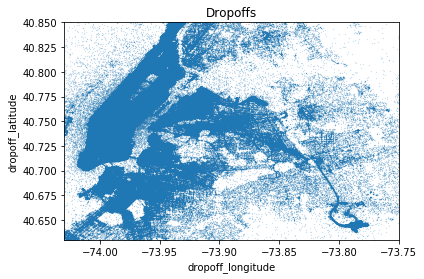

In [79]:
ny_lat=(40.63, 40.85)
ny_long=(-74.03, -73.75)
taxi_train.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',s=0.02, alpha=.6)
plt.title("Dropoffs")
plt.ylim(ny_lat)
plt.xlim(ny_long)
# This latitude and longitude is where Laguardia and JFK are located, this shows that more dropoffs are in the airport region

(-74.03, -73.75)

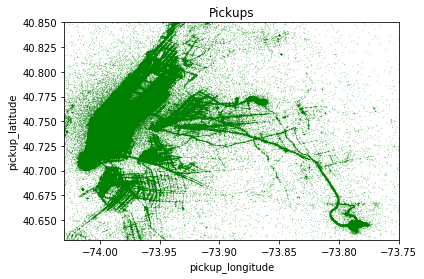

In [80]:
taxi_train.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',s=0.02, alpha=0.6, color='Green')
plt.title("Pickups")
plt.ylim(ny_lat)
plt.xlim(ny_long)

In [140]:
# As we see that pickups and dropoffs are the most in airports mainly JFK and Laguardia, let us anayze the fares 
JFK_coord={'min_lng':-73.8352,
          'min_lat':40.6195,
          'max_lng':-73.7401,
           'max_lat':40.6659}
JFK_airport=[40.6437,-73.7900]
JFK_pickups=taxi_train.loc[(taxi_train.pickup_latitude>=JFK_coord['min_lat'])&(taxi_train.pickup_latitude<=JFK_coord['max_lat'])&(taxi_train.pickup_longitude>=JFK_coord['min_lng'])&(taxi_train.pickup_longitude<=JFK_coord['max_lng'])]
print("Number of pickups from JFK",JFK_pickups.shape[0])
JFK_dropoffs=taxi_train.loc[(taxi_train.dropoff_latitude>=JFK_coord['min_lat'])&(taxi_train.dropoff_latitude<=JFK_coord['max_lat'])&(taxi_train.dropoff_longitude>=JFK_coord['min_lng'])&(taxi_train.dropoff_longitude<=JFK_coord['max_lng'])]
print("Number of dropoffs to JFK",JFK_dropoffs.shape[0])

Number of pickups from JFK 88137
Number of dropoffs to JFK 44592


C:\Users\Krithika Ganesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Krithika Ganesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\Krithika Ganesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Krithika Ganesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Fare Amount Distribution for pickups')

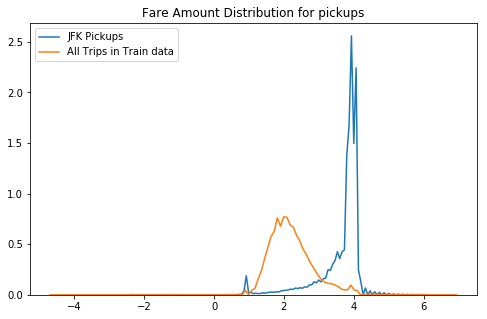

In [144]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(JFK_pickups['fare_amount'].values),label='JFK Pickups')
sns.kdeplot(np.log(taxi_train['fare_amount'].values),label='All Trips in Train data')
plt.title("Fare Amount Distribution for pickups")

In [143]:
# Fares foJFK is higher than fare to other trips 

C:\Users\Krithika Ganesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Krithika Ganesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\Krithika Ganesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Krithika Ganesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Krithika Ganesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, wh

Text(0.5, 1.0, 'Fare Amount Distribution for Dropoffs')

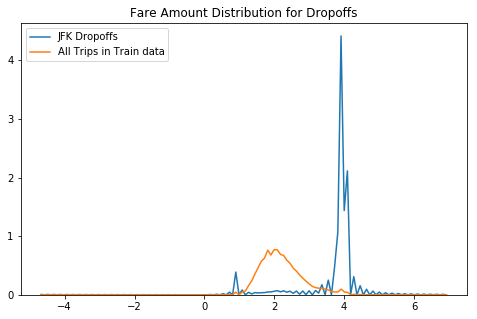

In [145]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(JFK_dropoffs['fare_amount'].values),label='JFK Dropoffs')
sns.kdeplot(np.log(taxi_train['fare_amount'].values),label='All Trips in Train data')
plt.title("Fare Amount Distribution for Dropoffs")

In [146]:
#Dropoffs to JFK is considerably higher

In [171]:
#To find distance using latitude and longitude
R=6373.0
def dist(lat1,lat2,lon1,lon2):
    dlon=lon2-lon1
    dlat=lat2-lat1
    a=sin(dlat/2)**2+cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c=2*atan2(sqrt(a),sqrt(1-a))
    distance=R*c/100
    return distance 
#calculate trip distance in miles
#def dist(lat1, lat2, lon1,lon2):
#    p = 0.017453292519943295 # Pi/180
#    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
#    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))
    

In [172]:
taxi_train['trip_distance']=taxi_train.apply(lambda row:dist(row['pickup_latitude'],row['dropoff_latitude'],row['pickup_longitude'],row['dropoff_longitude']),axis=1)

In [173]:
taxi_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_weekday,pickup_month,pickup_year,trip_distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.600970
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.074002
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.870235
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.614724
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.239889


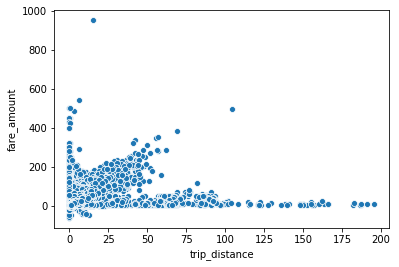

In [174]:
# How fare amount vary as Distance Increases?
sns.scatterplot(x=taxi_train.trip_distance,y=taxi_train.fare_amount)

In [175]:
#We see that fare amount increases with increase in trip distance but falls flat after 50 km

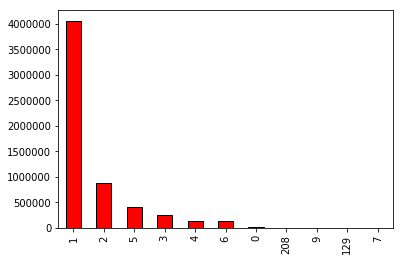

In [83]:
#Let us look at the count of passengers
taxi_train.passenger_count.value_counts().plot.bar(color='r', edgecolor='k')

In [81]:
# There are more single passeners than shared count and the count greater than 6 are almost zero, hence removing those values

In [87]:
taxi_train=taxi_train.loc[taxi_train.passenger_count<=6]

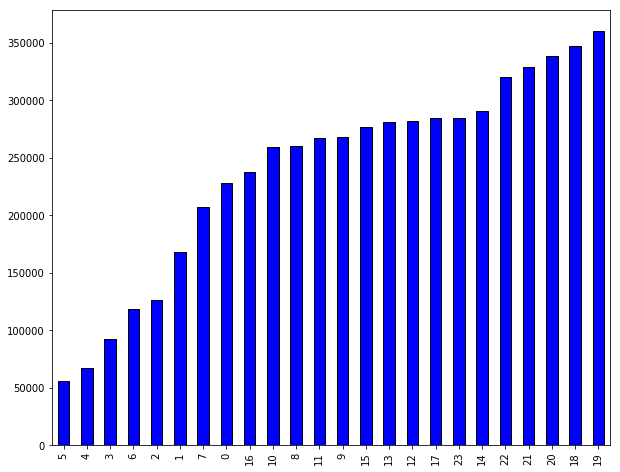

In [109]:
plt.figure(figsize=(10,8))
taxi_train.pickup_hour.value_counts(ascending=True).plot.bar(color='b',edgecolor='k')

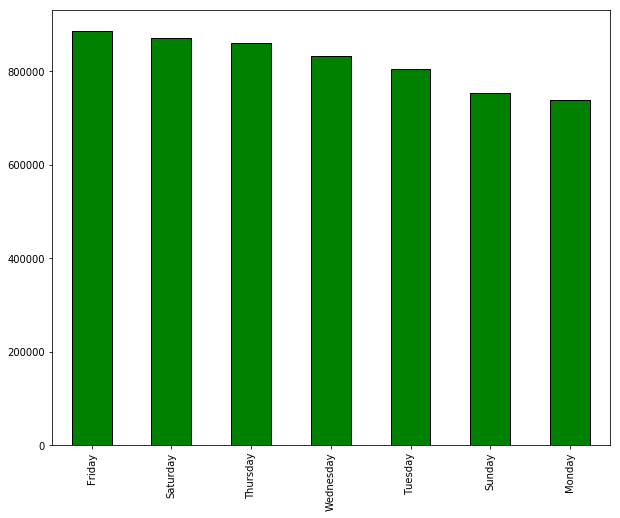

In [108]:
plt.figure(figsize=(10,8))
taxi_train.pickup_weekday.value_counts().plot.bar(color='g',edgecolor='k')

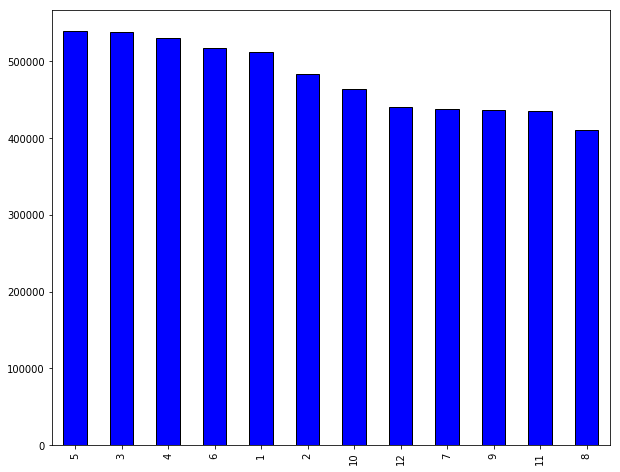

In [112]:
plt.figure(figsize=(10,8))
taxi_train.pickup_month.value_counts().plot.bar(color='b',edgecolor='k')

C:\Users\Krithika Ganesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


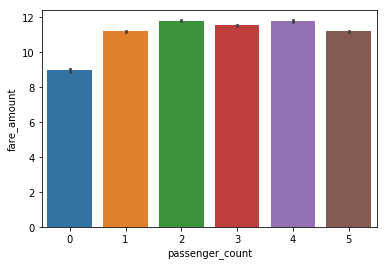

In [176]:
sns.barplot(x=taxi_train.passenger_count,y=taxi_train.fare_amount)
plt.show

In [177]:
# Fare amount for 4 passengers is higher than for 5 passengers